#### Importing prerequisite Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing the Red Wine dataset

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd, 'red_wine.csv')
redwine_df = pd.read_csv(filepath)

In [3]:
redwine_df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


#### Checking Dataset for level of Missingness

In [4]:
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.0+ KB


#### Replacing the categorical variables in Type Column with Numerical equivalents

In [5]:
redwine_df['type'] = np.where(redwine_df['type'] == 'low', 0, 1) # 0 representing low quality and 1 representing high quality classifications
redwine_df

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,0
1,0.66,0.57,8.3,0
2,0.23,0.44,8.5,1
3,0.44,0.84,8.6,0
4,0.08,0.50,8.7,0
...,...,...,...,...
566,0.40,0.70,12.7,0
567,0.28,0.60,12.8,1
568,0.31,0.60,12.8,1
569,0.34,0.72,12.8,0


#### Separating Predictor features from the Class

In [6]:
X = redwine_df.iloc[:,:-1]
y = redwine_df['type']

In [7]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: type, dtype: int32

In [8]:
X.head()

,citric acid,sulphates,alcohol
0,0.49,0.63,8.0
1,0.66,0.57,8.3
2,0.23,0.44,8.5
3,0.44,0.84,8.6
4,0.08,0.50,8.7


#### Splitting the dataset into train and test data randomly

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#### Scaling the numerical values to figures between 0 and 1

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Importing necessary libraries to calculate accuracy and scores

In [11]:
from sklearn.dummy import DummyClassifier
from mlxtend.classifier import OneRClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#### Function to compute required accuracies and AUC scores

In [12]:
def compute_accuracy_aucscore(model):
    model.fit(X_train_scaled, y_train)
    model_pred = model.predict(X_test_scaled)
    accuracy_sum = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring="accuracy")
    accuracy = sum(accuracy_sum)/10
    model_prob = model.predict_proba(X_test_scaled)
    model_prob_positive = model_prob[:, 1]
    model_auc_score = roc_auc_score(y_test, model_prob_positive)
    return accuracy, model_auc_score

## ZEROR: (AUC Score) 

In [13]:
dummyZero_clf = DummyClassifier(strategy="most_frequent")
compute_accuracy_aucscore(dummyZero_clf)

(0.5219323671497584, 0.5)

## ONER: (AUC Score)

In [14]:
oneR_clf = OneRClassifier()
oneR_clf.fit(X_train_scaled, y_train)
oneR_clf_pred = oneR_clf.predict(X_test_scaled)
accuracy_sum = cross_val_score(oneR_clf, X_train_scaled, y_train, cv=10, scoring="accuracy")
accuracy = sum(accuracy_sum)/10
accuracy

0.7260869565217392

## LOGISTIC REGRESSION (Accuracy, AUC Score)

In [15]:
LR_clf = LogisticRegression(solver= 'liblinear')
compute_accuracy_aucscore(LR_clf)

(0.7630917874396135, 0.9215686274509804)

## NAIVE BAYES (Accuracy, AUC Score)

In [16]:
gnb_clf = GaussianNB()
compute_accuracy_aucscore(gnb_clf)

(0.8158454106280194, 0.9347426470588235)

## DECISION TREE: (Accuracy, AUC Score)

In [17]:
dt_clf = DecisionTreeClassifier(max_depth=5)
compute_accuracy_aucscore(dt_clf)


(0.8158937198067632, 0.9221813725490197)

## SUPPORT VECTOR MACHINE: (Accuracy, AUC Score)

In [18]:
svm_clf = SVC(probability=True)
compute_accuracy_aucscore(svm_clf)

(0.8288888888888888, 0.9451593137254901)

## RANDOM FOREST: (Accuracy, AUC Score)

In [19]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
compute_accuracy_aucscore(rf_clf)

(0.8487922705314009, 0.9469975490196079)

# SHOWING ALL RESULTS IN A DATA FRAME (for AUC & ACCURACY):

In [20]:
result = {'Model' : ['ZeroR', 'OneR', 'LR', 'NB', 'DT','SVM', 'RF'],
        'AUC': ['N/A', 'N/A', 0.9216, 0.9347, 0.9176, 0.9452, 0.9470],
        'ACCURACY' : [0.5219, 0.7261, 0.7631, 0.8158, 0.8049, 0.8289, 0.8488]}
df = pd.DataFrame(result)
df

,Model,AUC,ACCURACY
0,ZeroR,N/A,0.5219
1,OneR,N/A,0.7261
2,LR,0.9216,0.7631
3,NB,0.9347,0.8158
4,DT,0.9176,0.8049
5,SVM,0.9452,0.8289
6,RF,0.947,0.8488


## Plot of the ROC curve of the Random Forest classifier:

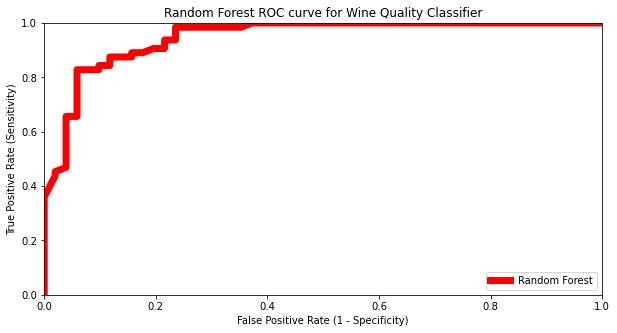

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
%matplotlib inline
plt.figure(figsize=(10,5))
rf_prob = rf_clf.predict_proba(X_test_scaled)
rf_prob_positive = rf_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_prob_positive,drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Random Forest ROC curve for Wine Quality Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=7, label = "Random Forest")
plt.legend(loc="lower right")
plt.show()

##### Importing the Wine Dataset:

In [22]:
filepath = os.path.join(pwd, 'white_wine.csv')
whitewine_df = pd.read_csv(filepath)

In [23]:
whitewine_df.head()

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low


#### Preprocessing the White Wine Dataset

In [24]:
whitewine_df['type'] = np.where(whitewine_df['type'] == 'low', 0, 1)
A = whitewine_df.iloc[:,:-1]
b = whitewine_df['type']
A_scaled = scaler.transform(A)

#### Using the Random Forest Model, based on its accuracy score:

Accuracy:

In [25]:
whitewine_pred = rf_clf.predict(A_scaled)
accuracy_sum = cross_val_score(rf_clf, A_scaled, b, cv=10, scoring="accuracy")
accuracy = sum(accuracy_sum)/10
print(f'Accuracy: {accuracy*100:.4f}%')

Accuracy: 91.0714%


AUC Score:


In [26]:
whitewine_prob = rf_clf.predict_proba(A_scaled)
whitewine_prob_positive = whitewine_prob[:, 1]
whitewine_auc_score = roc_auc_score(b, whitewine_prob_positive)
print(f'AUC score is {whitewine_auc_score:.4f}')

AUC score is 0.9740


In [27]:
pd.crosstab(b,whitewine_pred)

col_0,0,1
type,,
0,13,4
1,4,57
